In [1]:
from Func_Col import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
import scipy as sc

In [2]:
e = [0,0,1]
momentum1 = [2,np.sqrt(3),0,0]
momentum2 = [2,-np.sqrt(3),0,0]

In [3]:
bell_states = generate_bell_states()

In [4]:
k1 = np.array([1,0])
k2 = np.array([0,1])
k1k2 = np.kron(k1,k2)

rho_1 = rhob(7/60,generate_bell_states())
rho2mom = np.outer(k1k2,k1k2)
rho_2 = rho2(generate_bell_states())

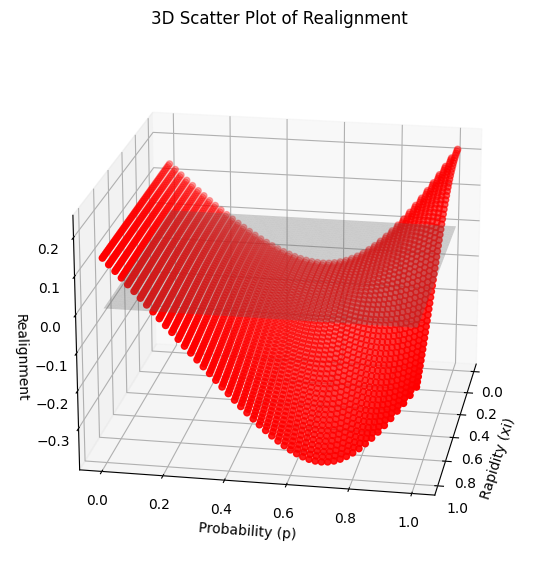

[[ 0.07302286-4.94146775e-20j  0.00173373+4.03985204e-03j
  -0.00494888+2.77689645e-04j -0.00068777+2.22819326e-03j
   0.05344786+3.62331758e-03j  0.00173373+3.76216240e-03j
   0.02583227-3.90100722e-03j -0.00068777-1.67281396e-03j
   0.0389022 +3.62331758e-03j]
 [ 0.00173373-4.03985204e-03j  0.17910087+4.69316341e-20j
  -0.00277969-1.95050361e-03j -0.00382306-2.08934843e-03j
   0.00346746-2.77689645e-04j -0.00998364+4.06650926e-04j
  -0.00422076-9.88354221e-06j -0.02088339+3.62331758e-03j
   0.00173373+3.76216240e-03j]
 [-0.00494888-2.77689645e-04j -0.00277969+1.95050361e-03j
   0.0812096 -2.73601752e-20j -0.01159342+2.74008369e-02j
  -0.02919834+3.41031577e-21j -0.00277969-1.95050361e-03j
   0.00213814+7.04780144e-21j -0.01159342-2.74008369e-02j
  -0.00494888+2.77689645e-04j]
 [-0.00068777-2.22819326e-03j -0.00382306+2.08934843e-03j
  -0.01159342-2.74008369e-02j  0.08651338+2.97653196e-19j
  -0.00137554-3.90100722e-03j -0.02088339+3.62331758e-03j
  -0.00035819-1.38844823e-04j  0.0347

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of points
xi = np.linspace(0, 1, 51)
p = np.linspace(0, 1, 51)
xi, p = np.meshgrid(xi, p)

z = np.zeros_like(xi)
PPTg = []

# Define the function to plot
for i in range(xi.shape[0]):
    for j in range(xi.shape[1]):
        r = realign_general(e, xi[i, j], momentum1, momentum2, rho_1, rho_2, (np.pi / 4), 0, p[i, j])
        z[i, j] = r[0]
        PPTg.append(r[1])

# Convert PPTg to boolean NumPy array
PPTgbool = np.array(PPTg, dtype=bool)

# Convert xi, p, and z to 1D arrays for scatter plot
xi_flat = xi.ravel()
p_flat = p.ravel()
z_flat = z.ravel()
PPTgbool_flat = PPTgbool.ravel()

# Assign colors: Red for True, Blue for False
colors = np.where(PPTgbool_flat, 'red', 'blue')

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 10)

# Create scatter plot with colors
ax.scatter(xi_flat, p_flat, z_flat, c=colors, marker='o')

# Plot a reference plane at z = 0
plane_z = np.zeros_like(xi_flat)
ax.plot_trisurf(xi_flat, p_flat, plane_z, color='gray', alpha=0.3)

# Labels and title
ax.set_title("3D Scatter Plot of Realignment")
ax.set_xlabel("Rapidity (xi)")
ax.set_ylabel("Probability (p)")
ax.set_zlabel("Realignment")

# Show plot
plt.show()

print(r[2])


In [7]:
r = realign_general(e,0.95,momentum1,momentum2,rho_1,rho_2,(np.pi/4),0,0.04)[2]

sc.linalg.eigvalsh(r)

array([0.00138269, 0.00161721, 0.00694284, 0.00821222, 0.21612027,
       0.21828812, 0.21857456, 0.22092306, 0.26793902])